<table align="right">
  <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
  </tr>
</table>

<h1 align="left"> Figure 2: Plot timeseries, residuals, and models </h1>

<p align="left"><i>Marie E Galteau, 2023</i></p>

---

In [2]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiSpheresMasker
from numpy import genfromtxt

In [3]:
# Init var
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

glover_path = analysis_folder+'first_level/glover/mask_ROIs/'
spm_path = analysis_folder+'first_level/spm/mask_ROIs/'
gamma_path = analysis_folder+'first_level/rat_hrf_gamma_diff/mask_ROIs/'
dd_path = analysis_folder+'first_level/rat_hrf_delay_disp/mask_ROIs/'

hrf_path = glover_path
hrf = 'glover'
#hrf = 'rat_hrf_delay_disp'
#hrf = 'rat_hrf_gamma_diff'



In [ ]:
# --- Load data ---

subj_num = 201900

residuals_csv = pd.read_csv(hrf_path+'residuals/residuals_sub-0{}_ses-1.csv'.format(subj_num))
residuals_csv = ((residuals_csv - np.mean(residuals_csv)) / np.std(residuals_csv))
mean_residuals = residuals_csv.mean(axis=1)

timeseries_csv = pd.read_csv(hrf_path+'real_timeseries/real_timeseries_sub-0{}_ses-1.csv'.format(subj_num))
timeseries_csv = ((timeseries_csv - np.mean(timeseries_csv)) / np.std(timeseries_csv))
mean_timeseries = timeseries_csv.mean(axis=1)


glover_hrf_model = pd.read_csv(first_level_path+'{}/matrix/matrix_sub-0{}_ses-1.csv'.format(hrf, subj_num))
glover_hrf_model = glover_hrf_model.iloc[:, 0]

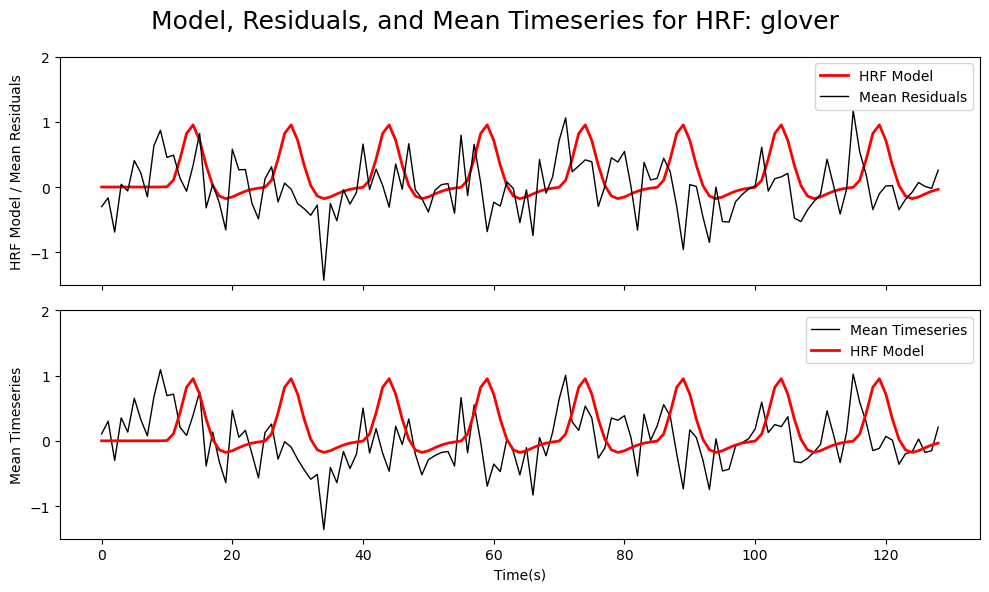

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot model and residuals in the first subplot (ax1)
ax1.plot(glover_hrf_model, color='red', linewidth=2, label='HRF Model')
ax1.plot(mean_residuals, color='black', linewidth=1, label='Mean Residuals')
ax1.set_ylabel('HRF Model / Mean Residuals')
ax1.set_ylim(-1.5, 1.8)
ax1.set_yticks([-1, 0, 1, 2])
ax1.legend()

# Plot mean timeseries in the second subplot (ax2)
ax2.plot(mean_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax2.plot(glover_hrf_model, color='red', linewidth=2, label='HRF Model')

ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Mean Timeseries')
ax2.set_ylim(-1.5, 1.8)
ax2.set_yticks([-1, 0, 1, 2])
ax2.legend()

fig.suptitle("Model, Residuals, and Mean Timeseries for HRF: {}".format(hrf), fontsize=18)

plt.tight_layout()

#plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/model_residuals/{}_signals_{}.svg'.format(hrf, subj_num), format='svg', dpi=1200) 

# Display the plot
plt.show()


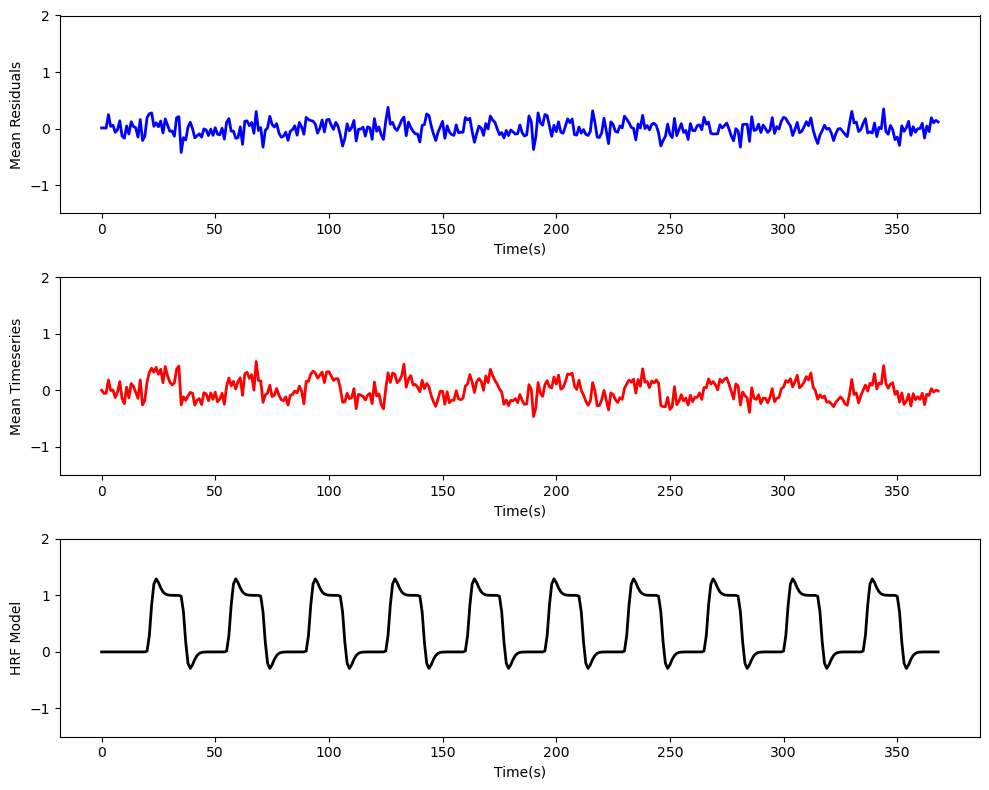

In [5]:
# --- Plot: residuals, timeseries, models ---
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot mean_residuals
axes[0].plot(mean_residuals, color='blue', linewidth=2)
axes[0].set_xlabel('Time(s)')
axes[0].set_ylabel('Mean Residuals')
axes[0].set_ylim(-1.5, 1.8)
axes[0].set_yticks([-1, 0, 1, 2])

# Plot mean_timeseries
axes[1].plot(mean_timeseries, color='red', linewidth=2)
axes[1].set_xlabel('Time(s)')
axes[1].set_ylabel('Mean Timeseries')
axes[1].set_ylim(-1.5, 1.8)
axes[1].set_yticks([-1, 0, 1, 2])

# Plot glover_hrf_model
axes[2].plot(glover_hrf_model, color='black', linewidth=2)
axes[2].set_xlabel('Time(s)')
axes[2].set_ylabel('HRF Model')
axes[2].set_ylim(-1.5, 1.8)
axes[2].set_yticks([-1, 0, 1, 2])

plt.tight_layout()
#plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_hrf/dd_model_signals.svg', format='svg', dpi=1200) 

plt.show()